# Unit cell configuration (fcc lattice), v 2.0 on cpu

In [19]:
# import hoomd packages and molecular dynamics component

from __future__ import division
import hoomd
import hoomd.md
import ex_render

#--- Initialization
# define parameters for this simulation

gb_kappa = 5.0;
gb_parallel_semiaxis = gb_kappa/2.0;
gb_perpendicular_semiaxis = 0.50;
gb_epsilon =1.0;
gb_r_cut = 6.5;

density= 0.005;
temperature= 0.70; 
md_time_step = 0.001

print("rho= ", density)
print("T= ", temperature);
print("dt= ", md_time_step);

unit_cell_side_3 = 1.0/(gb_kappa*density)**(1./3.);
unit_cell_side_2 = unit_cell_side_3
unit_cell_side_1 = gb_kappa*unit_cell_side_3;

n_x = 4;
n_y = 15;
n_z = n_y;

n_xyz = n_x * n_y * n_z;

print("cell sides= ", unit_cell_side_1, unit_cell_side_2, unit_cell_side_3);
print("repeats= "   , n_x, n_y, n_z);
print("particles="  , n_xyz);

# Calculate the density

#volume = n_x*unit_cell_side_1*n_y*unit_cell_side_2*n_y*unit_cell_side_3 
#total_mass = 6*n_x*n_y*n_z
#density = total_mass/volume
#print("The density is" ,density)

# Save the data

log_file= "log_rho_" + str(density) + "_T_" + str(temperature) + ".log";
log_period = 1e3;

trajectory_file= "trajectory_rho_" + str(density) + "_T_" + str(temperature) + ".gsd";
trajectory_period = 1e3;

print("output files:", trajectory_file, ",", log_file)

                                  # ----- Begin hoomd code ----


# ----- System initialization

# Initialize execution context (automatic selection between GPU and CPU)

hoomd.context.initialize("")

# Initialize a unit cell with a six particles, then replicate it as needed

uc = hoomd.lattice.unitcell(N = 4,
                            a1 = [unit_cell_side_1, 0,   0],
                            a2 = [0,    unit_cell_side_2, 0],
                            a3 = [0,    0,   unit_cell_side_3],
                            dimensions = 3,
                            position = [
                                        [0,0,0],
                                        [(unit_cell_side_1)/2,(unit_cell_side_2)/2, 0],
                                        [(unit_cell_side_1)/2, 0 ,(unit_cell_side_3)/2],
                                        [0 ,(unit_cell_side_2)/2,(unit_cell_side_3)/2],
                                        ],
                            type_name = ['R1','R2','R3','R4'],
                            mass = [1.0,1.0,1.0,1.0],
                            moment_inertia = [
                                             [0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2],
                                             [0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2],
                                             [0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2],
                                             [0,
                                               1/12*1.0*8**2,
                                               1/12*1.0*8**2]
                                              ],
                            orientation = [
                                          [1, 0, 0, 0],
                                          [0, 1, 0, 0],
                                          [0, 0, 1, 0],
                                          [0, 0, 0, 1]
                                          ]);

# Create lattice from previous unit cell

system = hoomd.init.create_lattice(unitcell=uc, n=[n_x,n_y,n_z]);


rho=  0.005
T=  0.7
dt=  0.001
cell sides=  17.09975946676697 3.4199518933533937 3.4199518933533937
repeats=  4 15 15
particles= 900
output files: trajectory_rho_0.005_T_0.7.gsd , log_rho_0.005_T_0.7.log
notice(2): Group "all" created containing 3600 particles


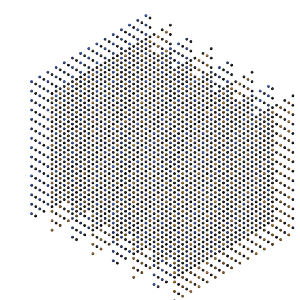

In [20]:
# Visualize the lattice
ex_render.render_sphere_frame(system.take_snapshot())